# Stock-Value-Predictor

Importing Libraries

In [426]:
import yfinance as yf
import pandas as pd

Scraping Dataset using Yahoo finance

In [427]:
nifbk = yf.Ticker('^NSEBANK')

In [428]:
nifbk = nifbk.history(period="max")

In [429]:
nifbk

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,6898.000000,6977.200195,6843.000000,6897.100098,0,0.0,0.0
2007-09-18 00:00:00+05:30,6921.149902,7078.950195,6883.600098,7059.649902,0,0.0,0.0
2007-09-19 00:00:00+05:30,7111.000000,7419.350098,7111.000000,7401.850098,0,0.0,0.0
2007-09-20 00:00:00+05:30,7404.950195,7462.899902,7343.600098,7390.149902,0,0.0,0.0
2007-09-21 00:00:00+05:30,7378.299805,7506.350098,7367.149902,7464.500000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-20 00:00:00+05:30,42516.050781,42709.199219,42366.148438,42506.800781,159100,0.0,0.0
2023-01-23 00:00:00+05:30,42891.449219,43005.851562,42727.699219,42821.250000,203600,0.0,0.0
2023-01-24 00:00:00+05:30,42994.449219,43078.898438,42615.648438,42733.449219,159500,0.0,0.0


Preprocessing

In [430]:
nifbk.reset_index(level=0, inplace=True)

In [431]:
nifbk

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2007-09-17 00:00:00+05:30,6898.000000,6977.200195,6843.000000,6897.100098,0,0.0,0.0
1,2007-09-18 00:00:00+05:30,6921.149902,7078.950195,6883.600098,7059.649902,0,0.0,0.0
2,2007-09-19 00:00:00+05:30,7111.000000,7419.350098,7111.000000,7401.850098,0,0.0,0.0
3,2007-09-20 00:00:00+05:30,7404.950195,7462.899902,7343.600098,7390.149902,0,0.0,0.0
4,2007-09-21 00:00:00+05:30,7378.299805,7506.350098,7367.149902,7464.500000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
3490,2023-01-20 00:00:00+05:30,42516.050781,42709.199219,42366.148438,42506.800781,159100,0.0,0.0
3491,2023-01-23 00:00:00+05:30,42891.449219,43005.851562,42727.699219,42821.250000,203600,0.0,0.0
3492,2023-01-24 00:00:00+05:30,42994.449219,43078.898438,42615.648438,42733.449219,159500,0.0,0.0
3493,2023-01-25 00:00:00+05:30,42703.601562,42733.050781,41540.300781,41647.648438,244700,0.0,0.0


In [432]:
# nifbk['Date'] = nifbk['Date'].series.str.replace(" 00:00:00+05:30", "")
nifbk['Date'].dtype

datetime64[ns, Asia/Kolkata]

In [433]:
nifbk['Date'] = nifbk['Date'].dt.strftime('%Y-%m-%d')

In [434]:
nifbk.set_index('Date',inplace=True)

In [435]:
nifbk

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,0,0.0,0.0
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,0,0.0,0.0
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,0,0.0,0.0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,0,0.0,0.0
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-20,42516.050781,42709.199219,42366.148438,42506.800781,159100,0.0,0.0
2023-01-23,42891.449219,43005.851562,42727.699219,42821.250000,203600,0.0,0.0
2023-01-24,42994.449219,43078.898438,42615.648438,42733.449219,159500,0.0,0.0


<AxesSubplot: xlabel='Date'>

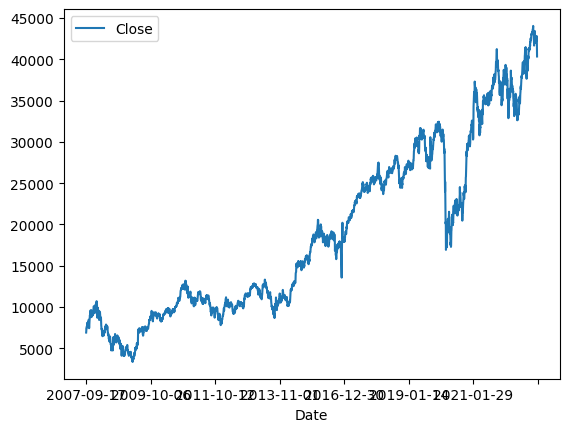

In [436]:
nifbk.plot.line(y='Close',use_index=True)

In [437]:
nifbk.drop(['Dividends','Stock Splits'],axis = 1, inplace= True)

In [438]:
nifbk

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,0
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,0
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,0
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,0
...,...,...,...,...,...
2023-01-20,42516.050781,42709.199219,42366.148438,42506.800781,159100
2023-01-23,42891.449219,43005.851562,42727.699219,42821.250000,203600
2023-01-24,42994.449219,43078.898438,42615.648438,42733.449219,159500


In [439]:
nifbk['Tomorrow']= nifbk['Close'].shift(-1)

Tomorrow is the closing value for the next day

In [440]:
nifbk

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,0,7059.649902
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,0,7401.850098
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,0,7390.149902
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,0,7464.500000
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,0,7650.899902
...,...,...,...,...,...,...
2023-01-20,42516.050781,42709.199219,42366.148438,42506.800781,159100,42821.250000
2023-01-23,42891.449219,43005.851562,42727.699219,42821.250000,203600,42733.449219
2023-01-24,42994.449219,43078.898438,42615.648438,42733.449219,159500,41647.648438


In [441]:
nifbk['Target'] = (nifbk['Tomorrow'] > nifbk['Close']).astype(int)

Target will return 1 if price is going to increase on next day and 0 if price is going to decrease

In [442]:
nifbk

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,0,7059.649902,1
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,0,7401.850098,1
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,0,7390.149902,0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,0,7464.500000,1
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,0,7650.899902,1
...,...,...,...,...,...,...,...
2023-01-20,42516.050781,42709.199219,42366.148438,42506.800781,159100,42821.250000,1
2023-01-23,42891.449219,43005.851562,42727.699219,42821.250000,203600,42733.449219,0
2023-01-24,42994.449219,43078.898438,42615.648438,42733.449219,159500,41647.648438,0


Crating Model using RandomForestClassifier

In [443]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200, min_samples_split=50 ,random_state = 1)
train = nifbk.iloc[:-100]
test = nifbk.iloc[-100:]

predictors = ['Open','High','Low','Close','Volume']
model.fit(train[predictor],train['Target'])

RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=1)

In [444]:
from sklearn.metrics import precision_score, accuracy_score
preds = model.predict(test[predictors])

In [445]:
preds = pd.Series(preds, index = test.index)

In [446]:
precision_score(test['Target'],preds)

0.5

In [447]:
combined = pd.concat([test['Target'],preds],axis=1)

<AxesSubplot: xlabel='Date'>

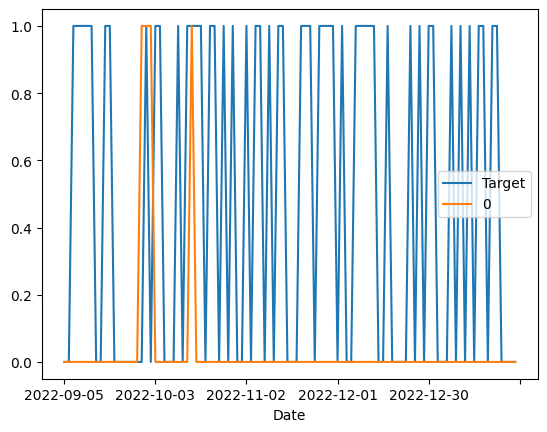

In [448]:
combined.plot()

Creating a BACKTEST

In [449]:
def predict(train, test, predictors, model):
    model.fit(train[predictor],train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name='Predictions')
    combined = pd.concat([test['Target'],preds],axis=1)
    return combined

In [462]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [463]:
predictions = backtest(nifbk,model,predictors)

In [464]:
predictions['Predictions'].value_counts()

0.0    671
1.0     73
Name: Predictions, dtype: int64

In [465]:
precision_score(predictions['Target'],predictions['Predictions'])

0.6438356164383562

Dividing Data based on horizon of 2,5,60,250 days based on new parameters

In [475]:
horizons = [2,5,60,250]
new_predictors = []

for horizon in horizons:
    rolling_averages = nifbk.rolling(horizon).mean()
    
    ratio_column = f"Ratio_column_{horizon}"
    nifbk[ratio_column] = nifbk["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    nifbk[trend_column] = nifbk.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column,trend_column]

C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_17364\182111509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifbk[ratio_column] = nifbk["Close"] / rolling_averages["Close"]
C:\Users\KAUSHAL\AppData\Local\Temp\ipykernel_17364\182111509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifbk[trend_column] = nifbk.shift(1).rolling(horizon).sum()["Target"]


In [476]:
nifbk

,Open,High,Low,Close,Volume,Tomorrow,Target,Ratio_column_2,Trend_2,Ratio_column_5,Trend_5,Ratio_column_60,Trend_60,Ratio_column_250,Trend_250
Date,,,,,,,,,,,,,,,
2009-10-06,8709.650391,8820.000000,8555.000000,8808.400391,0,8750.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-07,8827.299805,8971.500000,8724.750000,8750.000000,0,8834.599609,1,0.996674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-08,8784.650391,8870.900391,8738.299805,8834.599609,0,8696.799805,0,1.004811,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-09,8827.849609,8861.200195,8658.150391,8696.799805,0,8963.799805,1,0.992140,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-12,8720.700195,8981.299805,8698.549805,8963.799805,0,9150.000000,1,1.015118,1.0,1.017374,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-19,42416.300781,42506.250000,42234.898438,42328.851562,143400,42506.800781,1,0.998477,1.0,1.000395,3.0,0.994592,31.0,1.107585,133.0
2023-01-20,42516.050781,42709.199219,42366.148438,42506.800781,159100,42821.250000,1,1.002098,1.0,1.003957,3.0,0.998232,32.0,1.111742,134.0
2023-01-23,42891.449219,43005.851562,42727.699219,42821.250000,203600,42733.449219,0,1.003685,2.0,1.008271,4.0,1.005018,32.0,1.119406,135.0


In [468]:
nifbk = nifbk.dropna()

In [469]:
nifbk

,Open,High,Low,Close,Volume,Tomorrow,Target,Ratio_column_2,Trend_2,Ratio_column_5,Trend_5,Ratio_column_60,Trend_60,Ratio_column_250,Trend_250
Date,,,,,,,,,,,,,,,
2009-10-06,8709.650391,8820.000000,8555.000000,8808.400391,0,8750.000000,0,1.008397,1.0,1.009415,4.0,1.156630,34.0,1.523496,132.0
2009-10-07,8827.299805,8971.500000,8724.750000,8750.000000,0,8834.599609,1,0.996674,1.0,0.996731,3.0,1.143383,34.0,1.510846,131.0
2009-10-08,8784.650391,8870.900391,8738.299805,8834.599609,0,8696.799805,0,1.004811,1.0,1.005858,3.0,1.148676,34.0,1.522792,132.0
2009-10-09,8827.849609,8861.200195,8658.150391,8696.799805,0,8963.799805,1,0.992140,1.0,0.993886,2.0,1.126024,33.0,1.496293,132.0
2009-10-12,8720.700195,8981.299805,8698.549805,8963.799805,0,9150.000000,1,1.015118,1.0,1.017374,3.0,1.155544,33.0,1.539207,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-19,42416.300781,42506.250000,42234.898438,42328.851562,143400,42506.800781,1,0.998477,1.0,1.000395,3.0,0.994592,31.0,1.107585,133.0
2023-01-20,42516.050781,42709.199219,42366.148438,42506.800781,159100,42821.250000,1,1.002098,1.0,1.003957,3.0,0.998232,32.0,1.111742,134.0
2023-01-23,42891.449219,43005.851562,42727.699219,42821.250000,203600,42733.449219,0,1.003685,2.0,1.008271,4.0,1.005018,32.0,1.119406,135.0


Rebuilding Model and performing backtest on new terms

In [470]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50 ,random_state = 1)

In [471]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0 
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [472]:
predicitions = backtest(nifbk, model, new_predictors)

In [473]:
precision_score(predictions["Target"],predictions["Predictions"])

0.6438356164383562

predicting target for 26-Jan on basis of data of 25-Jan

In [477]:
model.predict([['0.987132','0.0','0.982080','2.0','0.976678','31.0','1.087708','135.0']])

c:\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

So, according to this model , the price is going to increase on day 26-jan-2023